### Subplots

Compare plots side by side using subplots - groups of smaller axes that can exist together within a single figure.

May be insents, grids of plots, or other complicated layouts.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

#### Creating by Hand

plt.axes is the most basic method to create an axes.

This creates a standard axes object that fills the entire figure by default. We can override that by passing in a coordinate system representing [left, bottom, width, height].

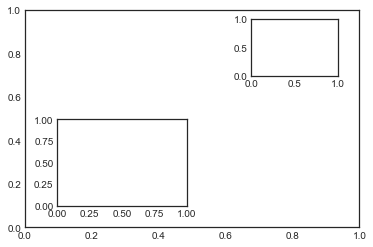

In [5]:
ax1 = plt.axes()
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])
ax3 = plt.axes([.2, .2, 0.3, 0.3])

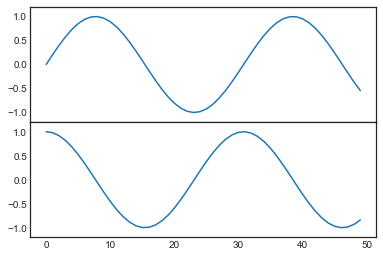

In [9]:
# equivalently, we can do this with the OO interface

fig = plt.figure()

ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4], ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

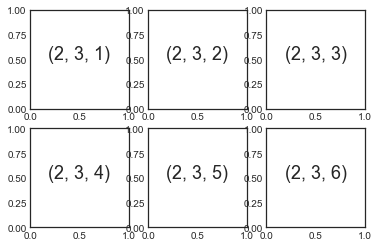

In [20]:
# the lowest level convenience method for creating subplots is subplot()

for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

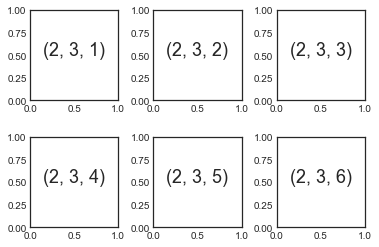

In [28]:
# we can change spacing between subplots using subplots_adjust

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

plt.subplots() is the easier tool.

Rather than creating a single subplot, this creates a full grid of subplots in a single command.

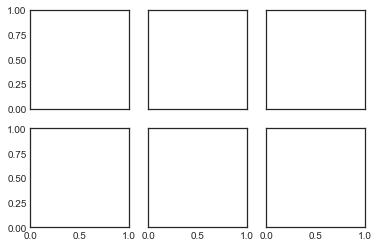

In [33]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

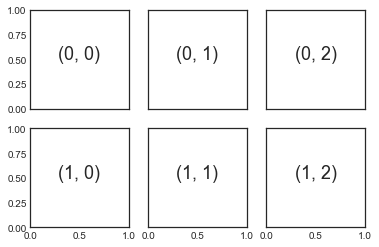

In [34]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

#### More Complicated Arrangements

plt.GridSpec() is best for complicated layouts.

This object does ont create a plot by itself, it is an interface that is interpreted by plt.subplot().

In [35]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

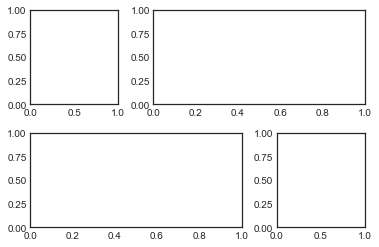

In [37]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2])

#### Example

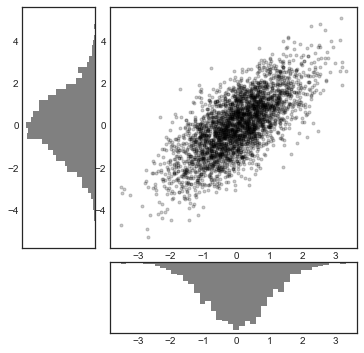

In [42]:
mean = [0, 0]
cov = [[1,1], [1,2]]

x, y = np.random.multivariate_normal(mean, cov, 3000).T

fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

x_hist.hist(x, 40, histtype='stepfilled', orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled', orientation='horizontal', color='gray')
y_hist.invert_xaxis()